In [1]:
#Importamos librerías a utilizar

!pip install --upgrade pandas-datareader
!pip install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as data


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 925 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
#Scrappeamos web para traernos tickers del ibex

ibex35 = pd.read_html('https://www.dividendmax.com/market-index-constituents/ibex-35')[0]
ibex35_tickers = list(ibex35.Ticker)
ibex35_tickers = [i for i in ibex35_tickers]

ibex35_tickers



['ANA',
 'ACX',
 'ACS',
 'AENA',
 'AMS',
 'BBVA',
 'SAB',
 'SAN',
 'BKT',
 'CABK',
 'CLNX',
 'ENG',
 'ELE',
 'FER',
 'GRF',
 'IBE',
 'IDR',
 'ITX',
 'IAG',
 'MAP',
 'TL5',
 'MEL',
 'MRL',
 'NTGY',
 'RED',
 'REP',
 'SGRE',
 'TRE',
 'TEF',
 'VIS']

In [3]:
#Confirmamos len del ibex, me faltan 5 de los 35

len(ibex35_tickers)

30

In [5]:
#Creamos DataFrame con los ticker de yfinance

df = pd.DataFrame(ibex35_tickers)
df['Ticker Completo'] = df[0] + '.MC'
df

,0,Ticker Completo
0,ANA,ANA.MC
1,ACX,ACX.MC
2,ACS,ACS.MC
3,AENA,AENA.MC
4,AMS,AMS.MC
5,BBVA,BBVA.MC
6,SAB,SAB.MC
7,SAN,SAN.MC
8,BKT,BKT.MC
9,CABK,CABK.MC


In [6]:
#Filtramos fecha y creamos dataframe para leer los datos

start = '11-03-2021'
end = '11-21-2022'


tickerinfo = data.DataReader(df['Ticker Completo'], start=start , end=end, data_source='yahoo')

In [8]:
#creamos variables para tener retornos y promedio(nos servirá para la std)

retornos_ticker = tickerinfo['Adj Close'].pct_change()*100
promedioret_ticker = retornos_ticker.mean()
retornos_ticker

Symbols,ANA.MC,ACX.MC,ACS.MC,AENA.MC,AMS.MC,BBVA.MC,SAB.MC,SAN.MC,BKT.MC,CABK.MC,...,TL5.MC,MEL.MC,MRL.MC,NTGY.MC,RED.MC,REP.MC,SGRE.MC,TRE.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-04,-0.250784,0.352730,-1.022675,0.205905,0.955634,-2.312793,-2.872066,-2.190332,-0.509888,-1.830485,...,-0.178489,0.094074,1.981040,0.950748,0.357823,0.000000,-1.273561,2.770778,-2.345420,2.931039
2021-11-05,-1.319928,-1.405970,4.716993,3.595890,4.699119,-0.231780,0.567499,1.436289,1.824517,1.580868,...,1.251682,8.176697,3.568433,0.085602,-0.301705,0.858208,-3.070172,3.921565,2.783839,-0.167513
2021-11-08,0.445858,1.024954,-0.815107,-0.991736,0.710369,-0.082985,-0.594007,-1.400723,-0.241589,-1.356745,...,-2.207514,-2.577468,-2.201838,-1.197592,-1.182940,0.166481,8.916685,1.061323,-0.172592,-1.845633
2021-11-09,-0.317051,-1.102776,0.389267,0.033391,2.981720,-0.797204,0.119515,-1.436074,-1.029284,0.606793,...,1.173816,1.397144,0.646244,0.086565,-0.167034,-0.221606,0.684268,0.291722,1.542759,0.598283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-15,0.535906,-0.083119,1.260986,-0.120525,-0.527908,0.782265,5.682393,1.419128,1.285715,2.116908,...,-0.120335,0.000000,0.882993,1.161046,0.466200,1.372334,0.055511,1.191100,-1.827748,0.617826
2022-11-16,0.159908,-1.476708,-1.094343,-1.769915,-3.032598,-0.905559,0.480078,-1.265095,1.022569,1.516082,...,-4.096383,-0.696524,-2.188187,0.450954,0.551040,0.463132,-0.027735,-1.944734,-1.636110,-0.526314
2022-11-17,-1.011173,-0.886633,-0.495991,-2.170353,-1.172788,-0.559497,-1.075012,-1.786061,1.047119,1.158187,...,-0.565331,0.200405,0.559290,-1.122332,-1.384481,-1.914897,0.000000,-0.052193,0.286779,0.617281


In [9]:
#Ranking de mejores rendimientos

promedioret_ticker.sort_values(ascending=False)

Symbols
CABK.MC    0.156182
SAB.MC     0.132732
BKT.MC     0.128231
REP.MC     0.125615
ACS.MC     0.107641
TRE.MC     0.102577
NTGY.MC    0.096793
ANA.MC     0.068546
MRL.MC     0.061675
IBE.MC     0.046040
MAP.MC     0.040057
TEF.MC     0.032834
VIS.MC     0.019153
RED.MC     0.017705
ELE.MC     0.017108
IDR.MC     0.012174
SGRE.MC    0.005357
BBVA.MC    0.003896
FER.MC     0.001797
ENG.MC    -0.007994
ACX.MC    -0.025095
AMS.MC    -0.034585
SAN.MC    -0.036522
IAG.MC    -0.045948
AENA.MC   -0.050164
MEL.MC    -0.056442
ITX.MC    -0.060494
TL5.MC    -0.114717
CLNX.MC   -0.136310
GRF.MC    -0.202149
dtype: float64

In [10]:
#Creamos variables con la posibilidad de elegir cada ticker para nuestra cartera

ticker1 = input("La acción elegida es: ")
tickerinfo1 = data.DataReader(ticker1, start=start , end=end, data_source='yahoo')
retornos_ticker1 = tickerinfo1['Adj Close'].pct_change()*100
promedioret_ticker1 = retornos_ticker1.mean()

print("El promedio simple de los retornos es:", promedioret_ticker1)
print("La volatilidad de los retornos es:", np.std(retornos_ticker1))
print('\n')

ticker2 = input("La acción elegida es: ")
tickerinfo2 = data.DataReader(ticker2, start=start , end=end, data_source='yahoo')
retornos_ticker2 = tickerinfo2['Adj Close'].pct_change()*100
promedioret_ticker2 = retornos_ticker2.mean()
print("El promedio simple de los retornos es:", promedioret_ticker2)
print("La volatilidad de los retornos es:", np.std(retornos_ticker2))
print('\n')

ticker3= input("La acción elegida es: ")
tickerinfo3 = data.DataReader(ticker3, start=start , end=end, data_source='yahoo')
retornos_ticker3 = tickerinfo3['Adj Close'].pct_change()*100
promedioret_ticker3 = retornos_ticker3.mean()
print("El promedio simple de los retornos es:", promedioret_ticker3)
print("La volatilidad de los retornos es:", np.std(retornos_ticker3))
print('\n')

ticker4= input("La acción elegida es: ")
tickerinfo4 = data.DataReader(ticker4, start=start , end=end, data_source='yahoo')
retornos_ticker4 = tickerinfo4['Adj Close'].pct_change()*100
promedioret_ticker4 = retornos_ticker4.mean()
print("El promedio simple de los retornos es:", promedioret_ticker4)
print("La volatilidad de los retornos es:", np.std(retornos_ticker4))
print('\n')


pond_ticker1 = 0.15
pond_ticker2 = 0.15
pond_ticker3 = 0.77
pond_ticker4 = 0.20

retorno_cartera = (pond_ticker1 * tickerinfo1['Adj Close'].pct_change().mean()*100) + (pond_ticker2 * tickerinfo2['Adj Close'].pct_change().mean()*100) + (pond_ticker3 * tickerinfo3['Adj Close'].pct_change().mean()*100) + (pond_ticker4 * promedioret_ticker4)
print("El retorno esperado de la cartera es:", retorno_cartera)

La acción elegida es: IBE.MC
El promedio simple de los retornos es: 0.04604038975373291
La volatilidad de los retornos es: 1.5573153604825671


La acción elegida es: BKT.MC
El promedio simple de los retornos es: 0.12823056516781264
La volatilidad de los retornos es: 2.3357563275208584


La acción elegida es: CABK.MC
El promedio simple de los retornos es: 0.15618160852721533
La volatilidad de los retornos es: 2.3712740336240388


La acción elegida es: ACS.MC
El promedio simple de los retornos es: 0.10764055586873639
La volatilidad de los retornos es: 1.5861751331870058


El retorno esperado de la cartera es: 0.16792859297793492


In [11]:
#Calculamos la volatilidad semanal de cada uno, con la media (rolling) de 5 días

tickerinfo1['Retornos Diarios'] = retornos_ticker1
tickerinfo2['Retornos Diarios'] = retornos_ticker2
tickerinfo3['Retornos Diarios'] = retornos_ticker3
tickerinfo4['Retornos Diarios'] = retornos_ticker4
tickerinfo1['Rolling Volatility 5d'] = retornos_ticker1.rolling(5).std()
tickerinfo2['Rolling Volatility 5d'] = retornos_ticker2.rolling(5).std()
tickerinfo3['Rolling Volatility 5d'] = retornos_ticker3.rolling(5).std()
tickerinfo4['Rolling Volatility 5d'] = retornos_ticker4.rolling(5).std()

#chequeamos un dataframe para comprobar que esten ok
tickerinfo1

,High,Low,Open,Close,Volume,Adj Close,Retornos Diarios,Rolling Volatility 5d
Date,,,,,,,,
2021-11-03,10.305,10.095,10.295,10.140,14392946.0,9.703269,NaN,NaN
2021-11-04,10.225,9.994,10.070,10.205,10088188.0,9.765470,0.641027,NaN
2021-11-05,10.330,10.165,10.200,10.275,10477490.0,9.832454,0.685929,NaN
2021-11-08,10.335,10.115,10.290,10.135,8657795.0,9.698484,-1.362522,NaN
2021-11-09,10.140,10.010,10.100,10.100,9161349.0,9.664991,-0.345343,NaN
...,...,...,...,...,...,...,...,...
2022-11-15,10.590,10.455,10.540,10.475,7739395.0,10.475000,-0.190562,1.679654
2022-11-16,10.520,10.335,10.385,10.485,9217424.0,10.485000,0.095458,1.537718
2022-11-17,10.520,10.365,10.460,10.490,10976473.0,10.490000,0.047688,1.056343


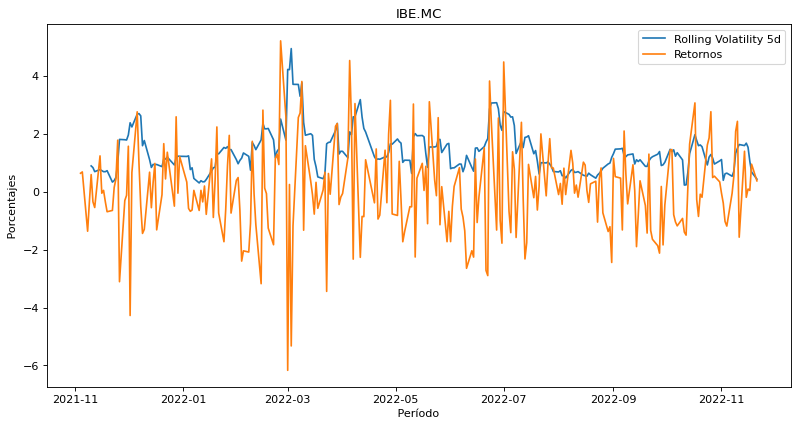

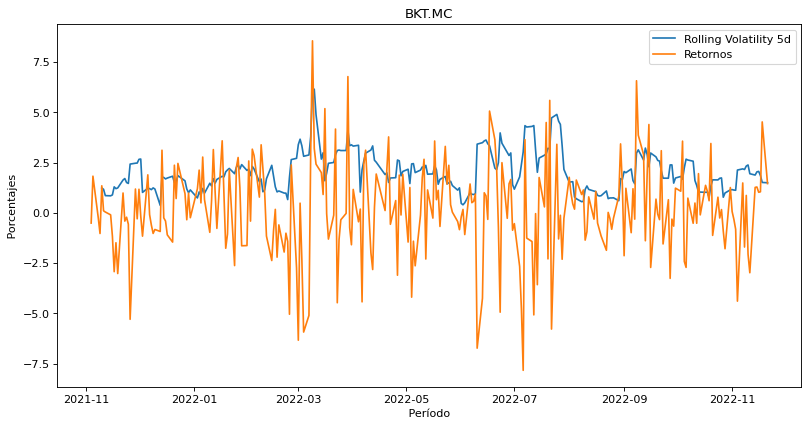

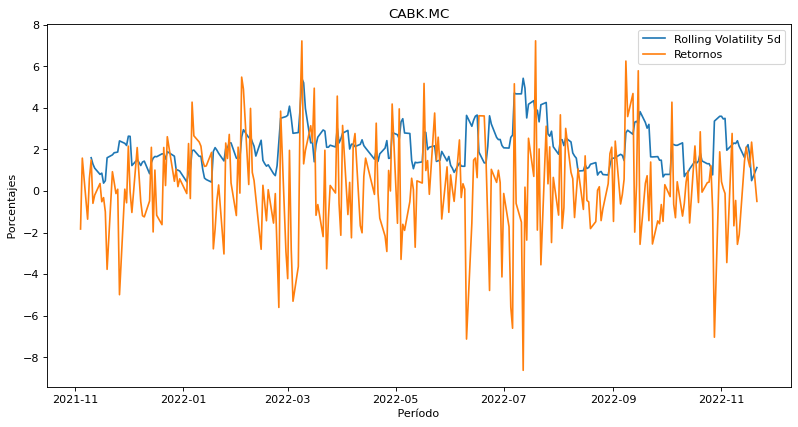

In [15]:
#Graficamos

from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)

plt.plot(tickerinfo1['Rolling Volatility 5d'], label='Rolling Volatility 5d')
plt.plot (retornos_ticker1, label='Retornos')
plt.legend()
plt.title(ticker1)
plt.ylabel (' Porcentajes ') 
plt.xlabel (' Período ') 
plt.show()

figure(figsize=(12, 6), dpi=80)

plt.plot(tickerinfo2['Rolling Volatility 5d'], label='Rolling Volatility 5d')
plt.plot (retornos_ticker2, label='Retornos')
plt.legend()
plt.title(ticker2)
plt.ylabel (' Porcentajes ') 
plt.xlabel (' Período ') 
plt.show()

figure(figsize=(12, 6), dpi=80)

plt.plot(tickerinfo3['Rolling Volatility 5d'], label='Rolling Volatility 5d')
plt.plot (retornos_ticker3, label='Retornos')
plt.legend()
plt.title(ticker3)
plt.ylabel (' Porcentajes ') 
plt.xlabel (' Período ') 
plt.show()